# Control Flow Graph generation with networkx

In [115]:
! pip install astor

In [123]:
import ast
import astor
import astpretty

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph

import graphviz
from graphviz import Digraph

In [251]:
src = """
a = "hello world"
print(a)
if a == "h":
    print("h")
"""

In [252]:
ast_tree = ast.parse(src, mode='exec')
astpretty.pprint(ast_tree)

Module(
    body=[
        Assign(
            lineno=2,
            col_offset=0,
            end_lineno=2,
            end_col_offset=17,
            targets=[Name(lineno=2, col_offset=0, end_lineno=2, end_col_offset=1, id='a', ctx=Store())],
            value=Constant(lineno=2, col_offset=4, end_lineno=2, end_col_offset=17, value='hello world', kind=None),
            type_comment=None,
        ),
        Expr(
            lineno=3,
            col_offset=0,
            end_lineno=3,
            end_col_offset=8,
            value=Call(
                lineno=3,
                col_offset=0,
                end_lineno=3,
                end_col_offset=8,
                func=Name(lineno=3, col_offset=0, end_lineno=3, end_col_offset=5, id='print', ctx=Load()),
                args=[Name(lineno=3, col_offset=6, end_lineno=3, end_col_offset=7, id='a', ctx=Load())],
                keywords=[],
            ),
        ),
        If(
            lineno=4,
            col_offset=0,
       

In [242]:
cfg = nx.DiGraph(comment='Control Flow Graph')

In [253]:
# add parent info to nodes

def ast_add_parents(root):
    node_id = 0
    for node in ast.walk(root):
        for child in ast.iter_child_nodes(node):
            child.parent = node
    node.node_id = node_id
    node_id += 1

In [254]:
class AstVisitor(ast.NodeVisitor):
    source_code = None
    cfg = None
    def visit_Module(self, node):
        print("node Mod", node)
        self.generic_visit(node)
        self.cfg.add_node(0, label="start", time_start = "", duration=0)
        # if isinstance(node.value, ast.Call):
        
    def visit_Constant(self, node):
        print("node Const", node)
        self.add_nx_node(node)
        
    def visit_Compare(self, node):
        print("node Comp", node)
        self.add_nx_node(node)
        
    def visit_Assign(self, node):
        print("node Assign", node._fields)
        self.add_nx_node(node)
        print(type(node.parent))

    def visit_Call(self, node):
        print("node Call", node)
        self.add_nx_node(node)
        
    def visit_Expr(self, node):
        print("node Expr", type(node.value))
        self.add_nx_node(node)
        
        print(type(node.parent))
        
            #print(node.value.func.id)
            #print(node.value.args[0].id)
            
    def add_nx_node(self,node):
        if isinstance(node.parent, ast.Module):
            parent_node = 0
        else:
            parent_node = self.cfg.nodes[node.parent.lineno]
            
        code = ast.get_source_segment(self.source_code, node)
        print(code)
        cfg.add_node(node.lineno, label=code, time_start = "", duration=0)
        cfg.add_edge(parent_node, node.lineno)
        
    def get_cfg(self):
        return self.cfg
        

In [249]:
ast_add_parents(ast_tree)
#astpretty.pprint(ast_tree)
av = AstVisitor()
av.source_code = src
av.cfg = cfg
av.visit(ast_tree)

node Mod <_ast.Module object at 0x7fc4781eabe0>
node Assign ('targets', 'value', 'type_comment')
a = "hello world"
<class '_ast.Module'>
node Expr <class '_ast.Call'>
print(a)
<class '_ast.Module'>


In [250]:
A = to_agraph(av.get_cfg())
print(A)

strict digraph "" {
	graph [comment="Control Flow Graph"];
	node [label="\N"];
	2	 [label="a = \"hello world\""];
	0	 [label=start];
	0 -> 2;
	3	 [label="print(a)"];
	0 -> 3;
}



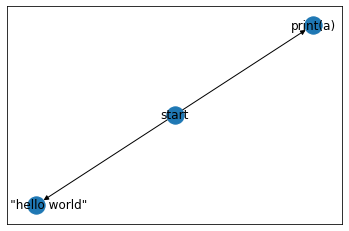

In [247]:
lab_dict = nx.get_node_attributes(cfg, 'label') 
#col_map = [col[1] for col in G.nodes.data('node_color')]

nx.draw_networkx(cfg, labels=lab_dict, with_labels=True)